# 1. Noise
Estimate the spectrum density by periodogram and Welsh method
Identify the color of the noise (white, pink, red…)

## Read the data

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fftshift, fft, fft2, ifft2
import scipy.signal
import math
import os
from scipy.signal import gaussian

In [ ]:
noise_name=['/content/noise1.wav','/content/noise2.wav','/content/noise3.wav']

In [ ]:
# read the noise
noises=[]
length=[]
rates=[]
for i in range(len(noise_name)):
  samplerate, data = wavfile.read(noise_name[i])
  leng = data.shape[0] / samplerate
  noises.append(data)
  length.append(leng)
  rates.append(samplerate)

## Plot with spicy library

In this part, we are going to use the signal analytics package scipy, which has the implementation of periodogram and Welsh method, by which we can easily calculate power spectral density. 
The input of the function is the actual signal data and sampling frequency.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html

As PSD can be complicate to calculate for long signals. Welch's method is to estimate the PSD by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms. 
Scipy also has a method readily available for using this estimation approach.  
The parameter **nperseg** is the length of the segment, we can get a more accurate estimation when augment it.

In [ ]:
# this function is used to autoscale the plot axe

def autoscale_y(ax,margin=0.1):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    import numpy as np

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)


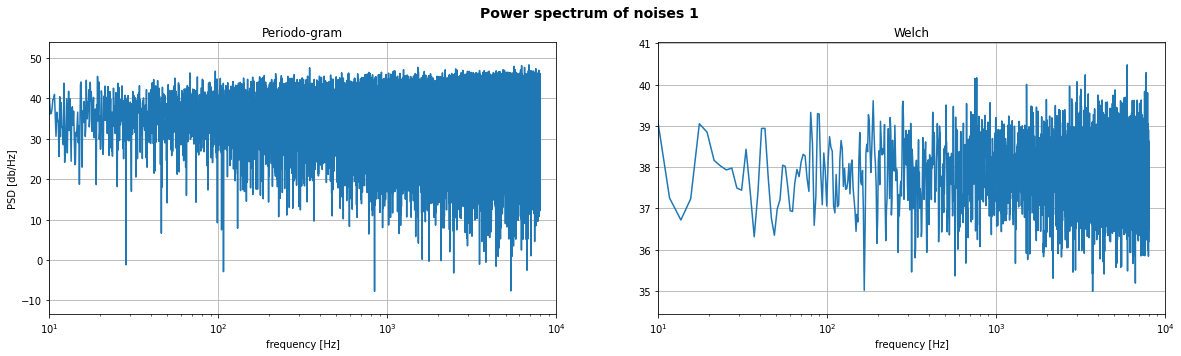

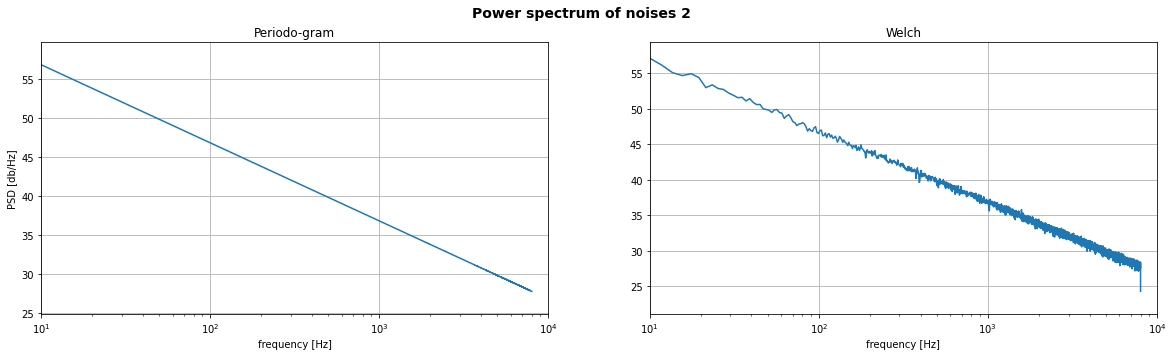

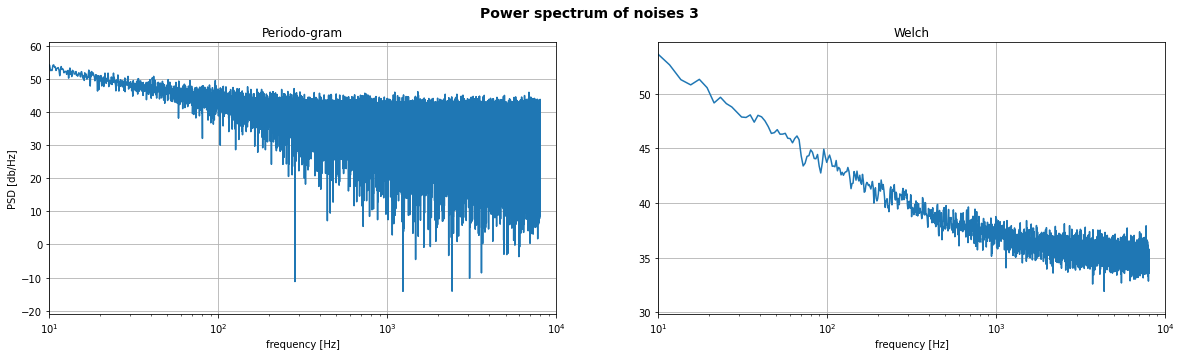

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

for i in range(len(noises)):

  (f1, S1) = scipy.signal.periodogram(noises[i], rates[i], scaling='density') # periodogram method
  PSD_period_dB = 10 * np.log10(S1) # Scale to dB

  (f2, S2)= scipy.signal.welch(noises[i], rates[i], nperseg=1024*8) #welch method
  PSD_welch_dB = 10 * np.log10(S2) # Scale to dB

  frame_per_second = 1600 # sampling rate of the noises 
  e = np.arange(-50, 30, 10)
  f = (e[0], e[-1])
  g = np.arange(-500, 550, 200)
  figure, (a0, a1) = plt.subplots(ncols = 2,figsize=(20,5))
  a0.plot(f1, PSD_period_dB)
  a0.set_title('Periodo-gram')
  #a0.set_yticks(e)
  #a0.set_xticks(g)
  a0.set_xscale('log')
  a0.set_xlim([10,10000])
  a0.grid(True)
  #a0.set_ylim(f)
  a0.set_xlabel('frequency [Hz]')
  a0.set_ylabel('PSD [db/Hz]')

  a1.plot(f2, PSD_welch_dB)
  a1.set_xscale('log')
  a1.set_xlim([10,10000])
  a1.set_title('Welch')
  #a1.set_xticks(g)
  #a1.set_yticks(e)
  autoscale_y(a0)
  # overwriting the y-label added by `psd`
  a1.set_ylabel('')
  a1.set_xlabel('frequency [Hz]')
  a1.grid(True)
  autoscale_y(a1)
  #a1.set_ylim(f)
  figure.suptitle(f'Power spectrum of noises {i+1}',fontsize = 14, fontweight ='bold')
  
  plt.show()

### Interpretation 

From the plot we can identify the coherence between periodogram and Welsh method.
The welsh method has a relatively lower variance by averaging over periodograms. In this way, bias is reduced by tapering and variance is reduced by averaging.

In the following part, we plot the PDS using matplotlib 

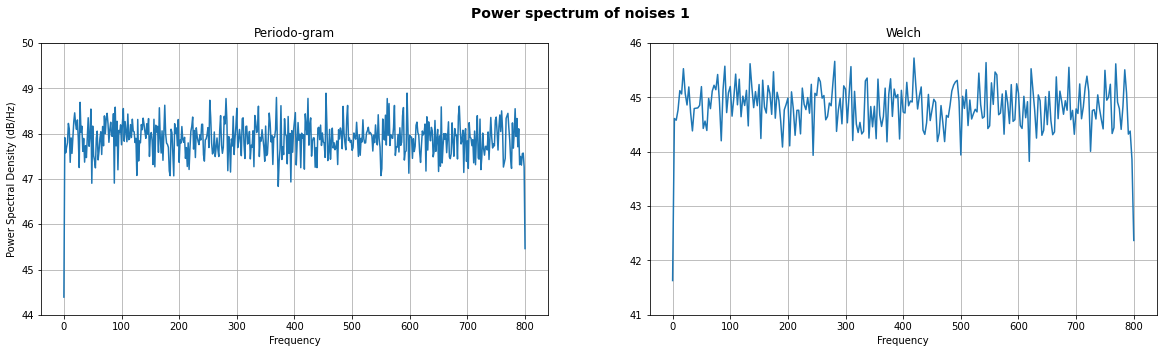

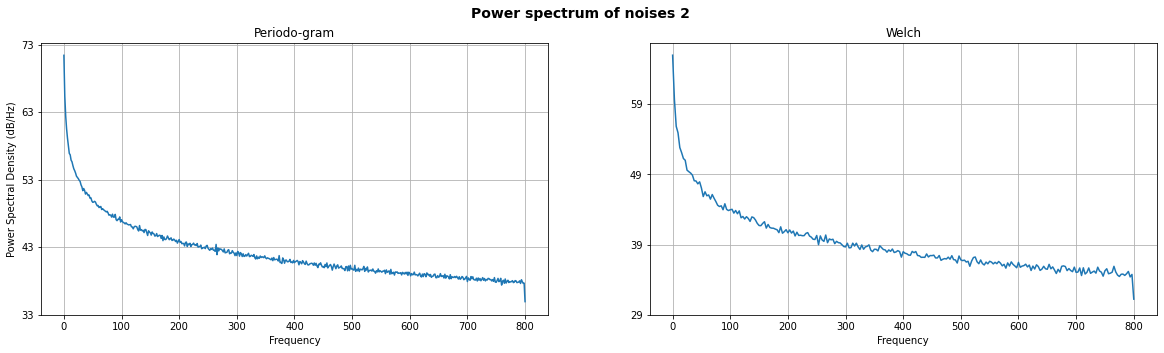

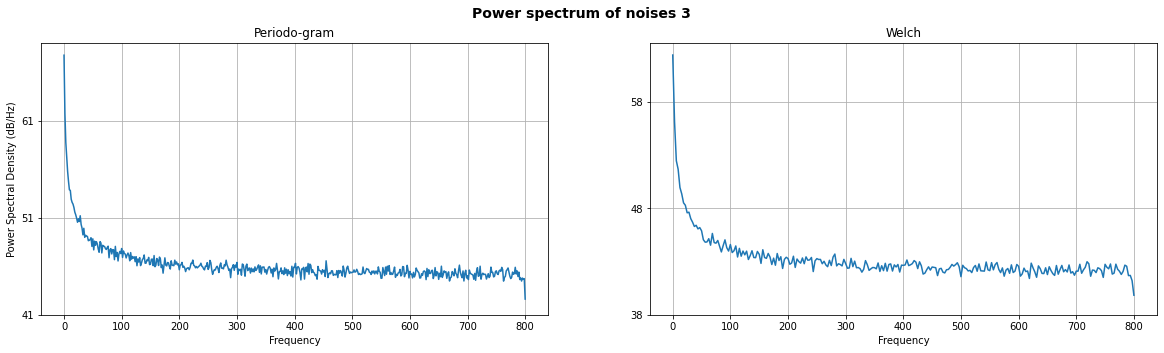

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
for count, d in enumerate(noises):

  frame_per_second = 1600 # sampling rate of the noises 
  e = np.arange(-50, 30, 10)
  f = (e[0], e[-1])
  g = np.arange(-500, 550, 200)
  figure, (a0, a1) = plt.subplots(ncols = 2,figsize=(20,5))
  a0.psd(d, NFFT = 1024,
        Fs = frame_per_second,
        window = mlab.window_none,
        pad_to = 1024)
  
  a0.set_title('Periodo-gram')
  #a0.set_yticks(e)
  #a0.set_xticks(g)
  a0.grid(True)
  #a0.set_ylim(f)
  
  a1.psd(d, NFFT = 1024,
        Fs = frame_per_second,
        window = mlab.window_none,
        pad_to = 512,
        noverlap = 75)  # ,scale_by_freq = True
  
  a1.set_title('Welch')
  #a1.set_xticks(g)
  #a1.set_yticks(e)
  
  # overwriting the y-label added by `psd`
  a1.set_ylabel('')
  a1.grid(True)
  #a1.set_ylim(f)
  figure.suptitle(f'Power spectrum of noises {count+1}',fontsize = 14, fontweight ='bold')
  
  plt.show()

## Identify the color of the noise

By definition, the White noise is a flat frequency spectrum when plotted as a linear function of frequency (e.g., in Hz). In other words, the signal has equal power in any band of a given bandwidth (power spectral density) when the bandwidth is measured in Hz. 
Therefore, the **first noise** is **white noise**


The **pink noise** is or 1⁄f noise is a signal or process with a frequency spectrum such that the power spectral density is inversely proportional to the frequency of the signal, the second noise has a **parabola** forme, so we can conclude that the second one is a pink noise. 
For the first plot, we plot it in logarithmic scale, and we can observe the function is linear. 

The **red noise** is a noise between white and red, the frequency density proportional to 1/f^2, its spectral density is inversely proportional to f**2, meaning it has higher intensity at lower frequencies, even more so than pink noise. 

We can obeserve from the plot that the third noise is red noise. 

# 2. Image

## Simulate a noisy version of the image with various SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB), using a Gaussian white noise


The noise of our image is generated by a guassian distribution, we suppose the noise is centered by zero, the variance of the data need to be obtained by the **Signal-to-noise ratio**

𝑆𝑁𝑅𝑑𝑏=10∗log10(var(x)/var(n)), where var(x) is the variance of signal and the var(n) is the variance of signal.

By using this function, we can have var(n) define as 10^(𝑆𝑁𝑅𝑑𝑏/10)/var(x)

We used the different SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB) to simulate a noisy version of the image using a Gaussian white noise. Firstly, we normalized the images, then we calcualted the sigma with given SNR. After that, we used the sigma we got to generate the corresponding noise. After adding the noise to the original image, we got the output images as shown below.

We can see that with the SNR gets higher, the images we got are getting more clear as the higher the signal-to-noise ratio, the better the picture will be.

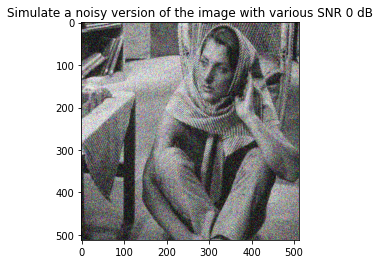

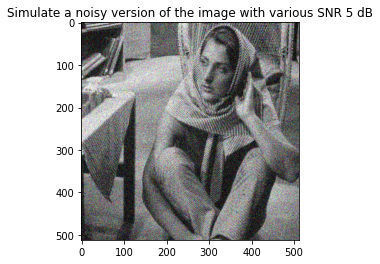

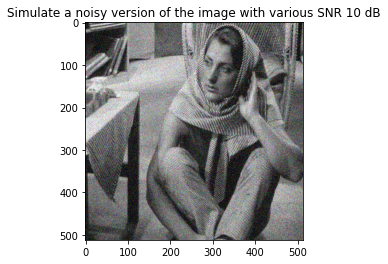

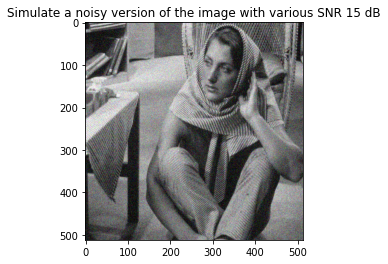

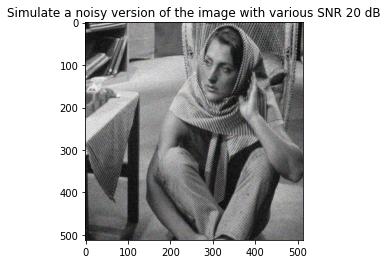

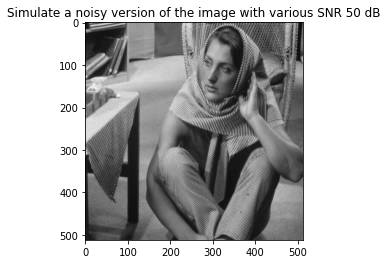

<Figure size 432x288 with 0 Axes>

In [ ]:
def add_noise(img, snr):
    ''' 
    signal: np.ndarray
    snr: float
    returns -> np.ndarray
    '''
    # calculate sigma using snr
    sigma = np.sqrt(np.var(img)/pow(10, snr/20))

    # Generate the noise
    noise = np.random.normal(0, sigma, np.shape(img))
    img = img + noise

    # return the new signal with noise
    return img


def normalize_images(data):
    normalized_img = (data-np.min(data)) / (np.max(data)-np.min(data))
    return normalized_img


import cv2
img = cv2.imread("/content/barbara.jpg")
snr_list = [0, 5, 10, 15, 20, 50]
for snr in snr_list:
  plt.imshow(add_noise(normalize_images(img), snr))
  plt.title("Simulate a noisy version of the image with various SNR {} dB".format(snr))
  plt.figure()

# Denoise the image using the Wiener filter

For denoising the images that we generated above, we used wiener filter here. Wiener filter is the linear filter.

However, Wiener Filtering does not work very well and is not very efficient as shown below, we can still see that the image is still very noisy. It is because that the hypothesis of stationarity of X0 is not realistic for such piecewise-regular signal.

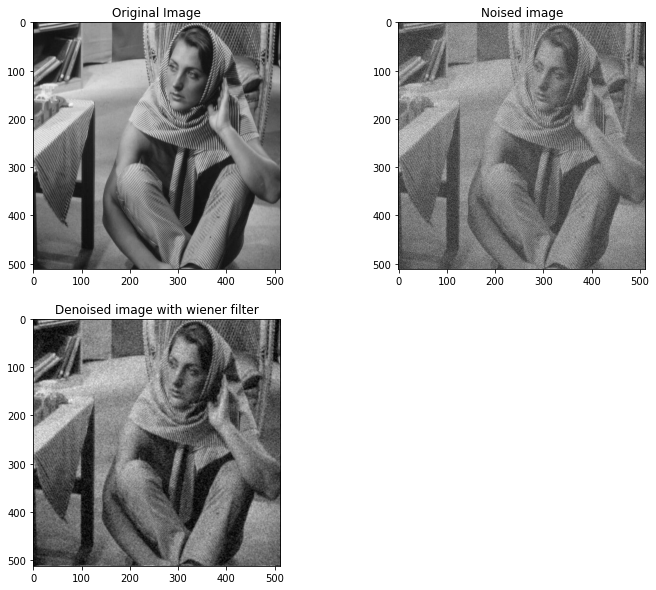

In [ ]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h


img = cv2.imread("/content/barbara.jpg")[:,:,0]
noisy_img = add_noise(normalize_images(img), 10)
kernel = gaussian_kernel(3)
filtered_img = wiener_filter(noisy_img, kernel, K = 30)


display = [img, noisy_img, filtered_img]
label = ['Original Image',  'Noised image', 'Denoised image with wiener filter']

fig = plt.figure(figsize=(12, 10))
for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()